<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/imbalanced-classification-with-python/01-foundation/02_challenge_of_imbalanced_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Challenge of Imbalanced Classification

Imbalanced classification is primarily challenging as a predictive modeling task because of the
severely skewed class distribution. This is the cause for poor performance with traditional
machine learning models and evaluation metrics that assume a balanced class distribution.

Nevertheless, there are additional properties of a classification dataset that are not only
challenging for predictive modeling but also increase or compound the diculty when modeling
imbalanced datasets.

Because the class distribution is not balanced, most machine learning algorithms will perform
poorly and require modification to avoid simply predicting the majority class in all cases.
Additionally, metrics like classification accuracy lose their meaning and alternate methods for
evaluating predictions on imbalanced examples are required, like ROC area under curve. This is
the foundational challenge of imbalanced classification.

For example, misclassifying an example from the majority class as an example from the
minority class called a false positive is often not desired, but less critical than classifying an
example from the minority class as belonging to the majority class, a so-called false negative.
This is referred to as cost sensitivity of misclassification errors and is a second foundational
challenge of imbalanced classification.

These two aspects, the skewed class distribution and cost sensitivity, are typically referenced
when describing the diculty of imbalanced classification. Nevertheless, there are other charac-
teristics of the classification problem that, when combined with these properties, compound
their eect.

There are many such characteristics, but perhaps three of the most common include:

- Dataset Size.
- Label Noise.
- Data Distribution.

##Setup

In [2]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from numpy import where

##Effect of Dataset Size

As such, the size of the dataset dramatically impacts the imbalanced classification task, and
datasets that are thought large in general are, in fact, probably not large enough when working
with an imbalanced classification problem.

To help, let's make this concrete with a worked example. We can use the make classification()
scikit-learn function to create a dataset of a given size with a ratio of about 1:100 examples
(1 percent to 99 percent) in the minority class to the majority class. The class distribution is
specified via the weight argument that takes a list of percentages that must add to one (e.g.
[0.99, 0.01]).

Size=100, Ratio=Counter({0: 99, 1: 1})
Size=1000, Ratio=Counter({0: 990, 1: 10})
Size=10000, Ratio=Counter({0: 9900, 1: 100})
Size=100000, Ratio=Counter({0: 99000, 1: 1000})


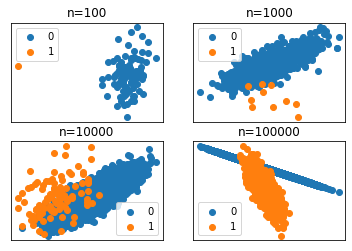

In [4]:
# dataset sizes
sizes = [100, 1000, 10000, 100000]

# create and plot a dataset with each size
for i in range(len(sizes)):
  # determine the dataset size
  n = sizes[i]
  # create dataset
  X, y = make_classification(n_samples=n, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
  # summarize class distribution
  counter = Counter(y)
  print("Size=%d, Ratio=%s" % (n, counter))

  # define subplot
  plt.subplot(2, 2, 1 + i)
  plt.title("n=%d" % n)
  plt.xticks([])
  plt.yticks([])
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_idx = where(y == label)[0]
    plt.scatter(X[row_idx, 0], X[row_idx, 1], label=str(label))
  plt.legend()
plt.show()

##Effect of Label Noise

Label noise refers to examples that belong to one class that are labeled as another class. This
can make determining the class boundary in feature space problematic for most machine learning algorithms, and this difficulty typically increases in proportion to the percentage of noise in the
labels.
This can be achieved
by setting the `flip y` argument to the make classification() function which is a percentage
of the number of examples in each class to change or 
ip the label. We will explore varying this
from 0 percent, 1 percent, 5 percent, and 7 percent.

Noise=0, Ratio=Counter({0: 990, 1: 10})
Noise=0, Ratio=Counter({0: 983, 1: 17})
Noise=0, Ratio=Counter({0: 963, 1: 37})
Noise=0, Ratio=Counter({0: 959, 1: 41})


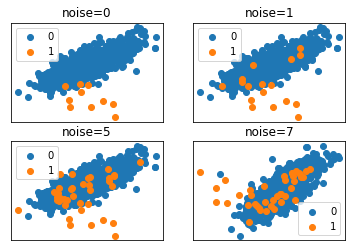

In [5]:
# label noise ratios
noise = [0, 0.01, 0.05, 0.07]

# create and plot a dataset with different label noise
for i in range(len(noise)):
  # determine the dataset size
  n = noise[i]
  # create dataset
  X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=n, random_state=1)
  # summarize class distribution
  counter = Counter(y)
  print("Noise=%d, Ratio=%s" % (n, counter))

  # define subplot
  plt.subplot(2, 2, 1 + i)
  plt.title("noise=%d" % int(n * 100))
  plt.xticks([])
  plt.yticks([])
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_idx = where(y == label)[0]
    plt.scatter(X[row_idx, 0], X[row_idx, 1], label=str(label))
  plt.legend()
plt.show()

##Effect of Data Distribution

We can use the number of clusters in the dataset as a proxy for concepts and compare a dataset
with one cluster of examples per class to a second dataset with two clusters per class. 

This can
be achieved by varying the n clusters per class argument for the `make classification()`
function used to create the dataset. 

We would expect that in an imbalanced dataset, such as a
1:100 class distribution, that the increase in the number of clusters is obvious for the majority
class, but not so for the minority class.

Clusters=0, Ratio=Counter({0: 9900, 1: 100})
Clusters=0, Ratio=Counter({0: 9900, 1: 100})


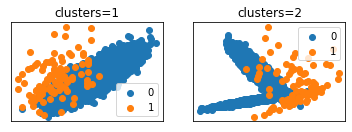

In [9]:
# number of clusters
clusters = [1, 2]

# create and plot a dataset with different label noise
for i in range(len(clusters)):
  # determine the dataset size
  c = clusters[i]
  # create dataset
  X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=c, weights=[0.99], flip_y=0, random_state=1)
  # summarize class distribution
  counter = Counter(y)
  print("Clusters=%d, Ratio=%s" % (n, counter))

  # define subplot
  plt.subplot(2, 2, 1 + i)
  plt.title("clusters=%d" % c)
  plt.xticks([])
  plt.yticks([])
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_idx = where(y == label)[0]
    plt.scatter(X[row_idx, 0], X[row_idx, 1], label=str(label))
  plt.legend()
plt.show()

- Imbalanced classification is specifically hard because of the severely skewed class distribu-
tion and the unequal misclassification costs.
- The difficulty of imbalanced classification is compounded by properties such as dataset
size, label noise, and data distribution.
